In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
expr = pd.read_csv(r'../../data/gene_expression.csv').drop(columns=["Unnamed: 0"])
cnv = pd.read_csv(r'../../data/cnv.csv').drop(columns=["Unnamed: 0"])
metab = pd.read_csv(r'../../data/metabolomics.csv').drop(columns=["Unnamed: 0"])

In [3]:
labels = pd.read_csv(r'../../data/labels.csv').drop(columns=["Unnamed: 0"])

In [4]:
emci_idx = labels.index[labels["DX_bl"]=="EMCI"].to_list()
lmci_idx = labels.index[labels["DX_bl"]=="LMCI"].to_list()
cn_idx = labels.index[labels["DX_bl"]=="CN"].to_list()
ad_idx = labels.index[labels["DX_bl"]=="AD"].to_list()

In [5]:
expr_c = expr.copy()
cnv_c = cnv.copy()
metab_c = metab.copy()

cnv_temp = cnv_c.loc[:, cnv_c.columns!="PTID"].copy()
cnv_temp[cnv_temp > 4] = 4
cnv_c.loc[:, cnv_c.columns!="PTID"] = cnv_temp


In [6]:
expr_c.to_csv(r'../../data/clean/gene_expression.csv')
cnv_c.to_csv(r'../../data/clean/cnv.csv')
metab_c.to_csv(r'../../data/clean/metabolomics.csv')

In [7]:
expr_scaler = MinMaxScaler()
expr_c.loc[:, expr_c.columns!='PTID'] = expr_scaler.fit_transform(expr.loc[:, expr.columns!='PTID'])

cnv_scaler = MinMaxScaler()
cnv_c.loc[:, cnv_c.columns!='PTID'] = cnv_scaler.fit_transform(cnv.loc[:, cnv.columns!='PTID'])

metab_scaler = MinMaxScaler()
metab_c.loc[:, metab_c.columns!='PTID'] = metab_scaler.fit_transform(metab.loc[:, metab.columns!='PTID'])

In [8]:
master = expr_c.merge(cnv_c, how='inner', on="PTID").merge(metab_c, how='inner', on="PTID")

In [9]:
master_PCA = PCA()
master_red = master_PCA.fit_transform(master.loc[:, master.columns!="PTID"])

In [10]:
master_PCA.n_components_

642

In [11]:
expr_pca = PCA()
expr_red = expr_pca.fit_transform(expr_c.loc[:, expr_c.columns!='PTID'])

cnv_pca = PCA()
cnv_red = cnv_pca.fit_transform(cnv_c.loc[:, cnv_c.columns!='PTID'])

metab_pca = PCA()
metab_red = metab_pca.fit_transform(metab_c.loc[:, metab_c.columns!='PTID'])

In [12]:
expr_pca.explained_variance_ratio_.shape

(642,)

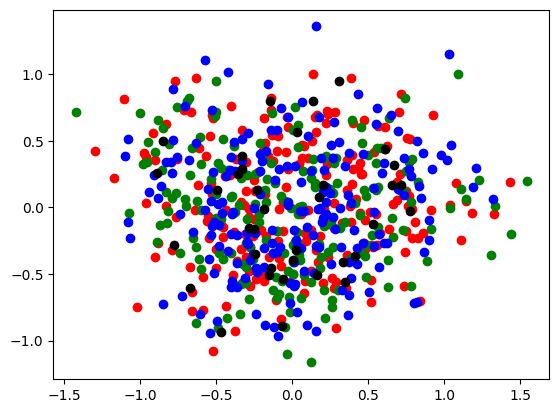

In [15]:
data = [metab_red]
groups = [(cn_idx, 'r'), (lmci_idx, 'g'), (emci_idx, 'b'), (ad_idx, 'k')]

for omic in data:
    for group_idx, group_color in groups:
        plt.scatter(omic[group_idx, 0], omic[group_idx, 1], c=group_color)

plt.savefig(r'../../results/metab_pca.png')

# 1800, -2800